# ‰ΩçÁΩÆÊòæËëóÊÄßÂàÜÊûê‰∏ªÁ®ãÂ∫è

Êú¨notebookÁî®‰∫éÂàÜÊûêRNAscopeÊï∞ÊçÆ‰∏≠Âü∫Âõ†Ë°®ËææÁöÑ‰ΩçÁΩÆÂàÜÂ∏ÉÊòæËëóÊÄßÔºåÂåÖÊã¨Ôºö
1. Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
2. ‰ΩçÁΩÆÂàÜÂ∏ÉÂå∫Èó¥ÂàõÂª∫
3. ËíôÁâπÂç°Ê¥õÊ®°ÊãüÂàÜÊûê
4. Â§öÈáçÊØîËæÉÊ†°Ê≠£
5. ÁªìÊûúÂèØËßÜÂåñÂíå‰øùÂ≠ò

**Ê≥®ÊÑè**: Êú¨Á®ãÂ∫è‰∏ìÈó®Â§ÑÁêÜ‰ΩçÁΩÆÂàÜÂ∏ÉÊòæËëóÊÄßÂàÜÊûê

In [1]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import os
from numba import njit, prange
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from modules.judge_sig import (
    create_position_bins,
    two_step_stratified_sample,
    count_positive_in_bins,  # ÂÅáËÆæËøô‰∏™ÂáΩÊï∞Â≠òÂú®‰∫éjudge_sigÊ®°Âùó‰∏≠
    correct_grid_pvalues,
    count_positive_in_x_bins
)

print('‚úÖ Ê®°ÂùóÂØºÂÖ•ÂÆåÊàêÔºÅ')

‚úÖ Ê®°ÂùóÂØºÂÖ•ÂÆåÊàêÔºÅ


In [2]:
# ÂàÜÊûêÂèÇÊï∞
n_simulations = 10000
num_xbins = 20
num_ybins = 10
correction_method = 'fdr'
bx_min = -0.6
bx_max = 0.6
by_min = -0.6
by_max = 0.6

cell_num = 0
random_num = 42

# Ë¶ÅÊØîËæÉÁöÑÊ†∑ÂìÅÁ±ªÂûã
sample_types = ['tmie', 'wt']

# ----------------------
# ËÆæÁΩÆË∑ØÂæÑÂíåÂèÇÊï∞
# ----------------------
base_folder = 'D:/Ruiqi/vg_space_mapping/wt/'
summary_folder = os.path.join(base_folder, "summary")
sample_info_path = os.path.join(summary_folder, "sample_info.csv")
results_file_path = os.path.join(summary_folder, 'vg_averageing_labels.csv')
vg_size_path = os.path.join(summary_folder, 'vg_size.csv')

# ÊâìÂç∞ÈÖçÁΩÆ‰ø°ÊÅØ
print(f'Ê†πÁõÆÂΩï: {base_folder}')
print(f'Ê±áÊÄªÊñá‰ª∂Â§π: {summary_folder}')
print(f'Ê®°ÊãüÊ¨°Êï∞: {n_simulations}')
print(f'xÂàÜÁÆ±Êï∞Èáè: {num_xbins}, yÂàÜÁÆ±Êï∞Èáè Ôºö{num_ybins}')
print(f'Ê†°Ê≠£ÊñπÊ≥ï: {correction_method}')
print(f'ÊØîËæÉÁöÑÊ†∑ÂìÅÁ±ªÂûã: {sample_types}')

Ê†πÁõÆÂΩï: D:/Ruiqi/vg_space_mapping/wt/
Ê±áÊÄªÊñá‰ª∂Â§π: D:/Ruiqi/vg_space_mapping/wt/summary
Ê®°ÊãüÊ¨°Êï∞: 10000
xÂàÜÁÆ±Êï∞Èáè: 20, yÂàÜÁÆ±Êï∞Èáè Ôºö10
Ê†°Ê≠£ÊñπÊ≥ï: fdr
ÊØîËæÉÁöÑÊ†∑ÂìÅÁ±ªÂûã: ['tmie', 'wt']


In [3]:
# ----------------------
# Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
# ----------------------
def load_data(sample_type):
    """Âä†ËΩΩÊåáÂÆöÊ†∑ÂìÅÁ±ªÂûãÁöÑÊâÄÊúâÂøÖË¶ÅÊï∞ÊçÆ"""
    try:
        # Âä†ËΩΩÊ†∑ÂìÅÊï∞ÊçÆ
        sample_data_path = os.path.join(summary_folder, sample_type + "_summary_all.csv")
        sample_data = pd.read_csv(sample_data_path)
        print(f"ÊàêÂäüÂä†ËΩΩ{sample_type}Êï∞ÊçÆÔºåÂÖ±{len(sample_data)}Ë°å")
        
        # Âä†ËΩΩBX/BYÊï∞ÊçÆ
        results_data = pd.read_csv(results_file_path, header=None)
        BX = results_data.iloc[:, 0].values
        BY = results_data.iloc[:, 1].values
        print(f"ÊàêÂäüÂä†ËΩΩBX/BYÊï∞ÊçÆÔºåÈïøÂ∫¶ÂàÜÂà´‰∏∫: {len(BX)}, {len(BY)}")
        
        return sample_data, BX, BY
    except Exception as e:
        print(f"{sample_type}Êï∞ÊçÆÂä†ËΩΩÈîôËØØ: {e}")
        raise

def preprocess_data(data, vg_size):
    """È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÔºöÂéªÈáç„ÄÅËÆ°ÁÆóÊ†áÂáÜÂåñÂùêÊ†áÁ≠â"""
    # ÂéªÈáç
    original_count = len(data)
    data = data.drop_duplicates(keep='first')
    deduplicated_count = len(data)
    removed_count = original_count - deduplicated_count
    print(f"ÂéªÈáçÂêéËÆ∞ÂΩïÊï∞: {deduplicated_count} (ÁßªÈô§‰∫Ü{removed_count}Êù°ÂÆåÂÖ®ÈáçÂ§çÁöÑËÆ∞ÂΩï)")
    
    # ËÆ°ÁÆóÊ†áÂáÜÂåñÂùêÊ†á
    avg_vg_size = vg_size.mean(axis=0).values
    print(f"vgÂ§ßÂ∞èÂπ≥ÂùáÂÄº: {avg_vg_size}")
    
    # Êü•ÊâæÂùêÊ†áÂàó
    x_col = next((col for col in data.columns if col.endswith('warpedROIvar1')), None)
    y_col = next((col for col in data.columns if col.endswith('warpedROIvar2')), None)
    
    if not x_col or not y_col:
        missing = []
        if not x_col: missing.append("warpedROIvar1ÁªìÂ∞æÁöÑÂàó")
        if not y_col: missing.append("warpedROIvar2ÁªìÂ∞æÁöÑÂàó")
        raise ValueError(f"Áº∫Â∞ëÂøÖË¶ÅÁöÑÂùêÊ†áÂàó: {', '.join(missing)}")
    
    print(f"ÊâæÂà∞ÂùêÊ†áÂàó: X={x_col}, Y={y_col}")
    
    # ËÆ°ÁÆóÊ†áÂáÜÂåñÂùêÊ†á
    data['standardized_x'] = data[x_col] / avg_vg_size[0]
    data['standardized_y'] = data[y_col] / avg_vg_size[1]
    
    # ÊèêÂèñÈò≥ÊÄßÊ†áËÆ∞Âàó
    is_positive_cols = [col for col in data.columns if col.endswith('_isPositive')]
    if not is_positive_cols:
        raise ValueError("Êú™ÊâæÂà∞‰ªª‰Ωï‰ª•'_isPositive'ÁªìÂ∞æÁöÑÂàóÔºåËØ∑Ê£ÄÊü•Êï∞ÊçÆÂàóÂêç")
    print(f"ÊâæÂà∞{len(is_positive_cols)}‰∏™Èò≥ÊÄßÊ†áËÆ∞Âàó")
    
    # ÈááÊ†∑ÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
    if cell_num > 0:
        data = two_step_stratified_sample(data, cell_num, random_num)
    
    return data, is_positive_cols, x_col, y_col

# Âä†ËΩΩvgÂ§ßÂ∞èÊï∞ÊçÆ
vg_size = pd.read_csv(vg_size_path, header=None)

# Âä†ËΩΩÂπ∂È¢ÑÂ§ÑÁêÜ‰∏§ÁßçÊ†∑ÂìÅÁöÑÊï∞ÊçÆ
data1, BX, BY = load_data(sample_types[0])
data2, BX, BY = load_data(sample_types[1])
data1, positive_cols1, x_col, y_col = preprocess_data(data1, vg_size)
data2, positive_cols2, x_col, y_col = preprocess_data(data2, vg_size)

# Á°Æ‰øù‰∏§ÁßçÊ†∑ÂìÅÊúâÁõ∏ÂêåÁöÑÈò≥ÊÄßÊ†áËÆ∞Âàó
common_markers = set(positive_cols1)
common_markers.intersection_update(positive_cols2)

common_markers = sorted(list(common_markers))
print(f"\n‰∏§ÁßçÊ†∑ÂìÅÂÖ±ÊúâÁöÑÊ†áËÆ∞Âàó: {common_markers}")

# ËÆ°ÁÆóBXÂíåBYÁöÑËæπÁïåÔºà‰ΩøÁî®‰∏§ÁßçÊ†∑ÂìÅÁöÑÂêàÂπ∂ËåÉÂõ¥Ôºâ
all_BX = BX
all_BY = BY

order_list=[0, 7, 2, 6, 4, 5, 3, 1, 0]
BX_ordered = BX[order_list]
BY_ordered = BY[order_list]
cs = CubicSpline(np.arange(len(BX_ordered)), np.c_[BX_ordered, BY_ordered], 
                axis=0, bc_type='periodic')
t_fine = np.linspace(0, len(BX_ordered)-1, 300)
x_fine, y_fine = cs(t_fine).T

actual_bx_min, actual_bx_max = x_fine.min(), x_fine.max()
actual_by_min, actual_by_max = y_fine.min(), y_fine.max()

# ÂàõÂª∫Âå∫Èó¥
bx_bins, by_bins = create_position_bins(
    actual_bx_min, actual_bx_max,
    actual_by_min, actual_by_max,
    num_xbins, num_ybins
)

print(f"BXÂå∫Èó¥: {actual_bx_min:.2f} Âà∞ {actual_bx_max:.2f}")
print(f"BYÂå∫Èó¥: {actual_by_min:.2f} Âà∞ {actual_by_max:.2f}")

ÊàêÂäüÂä†ËΩΩtmieÊï∞ÊçÆÔºåÂÖ±2090Ë°å
ÊàêÂäüÂä†ËΩΩBX/BYÊï∞ÊçÆÔºåÈïøÂ∫¶ÂàÜÂà´‰∏∫: 8, 8
ÊàêÂäüÂä†ËΩΩwtÊï∞ÊçÆÔºåÂÖ±3604Ë°å
ÊàêÂäüÂä†ËΩΩBX/BYÊï∞ÊçÆÔºåÈïøÂ∫¶ÂàÜÂà´‰∏∫: 8, 8
ÂéªÈáçÂêéËÆ∞ÂΩïÊï∞: 2090 (ÁßªÈô§‰∫Ü0Êù°ÂÆåÂÖ®ÈáçÂ§çÁöÑËÆ∞ÂΩï)
vgÂ§ßÂ∞èÂπ≥ÂùáÂÄº: [3088.18315202 1404.93479673]
ÊâæÂà∞ÂùêÊ†áÂàó: X=f2r_warpedROIvar1, Y=f2r_warpedROIvar2
ÊâæÂà∞5‰∏™Èò≥ÊÄßÊ†áËÆ∞Âàó
ÂéªÈáçÂêéËÆ∞ÂΩïÊï∞: 3604 (ÁßªÈô§‰∫Ü0Êù°ÂÆåÂÖ®ÈáçÂ§çÁöÑËÆ∞ÂΩï)
vgÂ§ßÂ∞èÂπ≥ÂùáÂÄº: [3088.18315202 1404.93479673]
ÊâæÂà∞ÂùêÊ†áÂàó: X=f2r_warpedROIvar1, Y=f2r_warpedROIvar2
ÊâæÂà∞5‰∏™Èò≥ÊÄßÊ†áËÆ∞Âàó

‰∏§ÁßçÊ†∑ÂìÅÂÖ±ÊúâÁöÑÊ†áËÆ∞Âàó: ['f2r_isPositive', 'fxyd7_isPositive', 'lypd1_isPositive', 'pcdh17_isPositive', 'slc17a7_isPositive']
x_binsÔºöË¶ÜÁõñ(-0.6, 0.6)ÔºåÂÖ±26‰∏™ÂàÜÁÇπÔºåÂü∫Á°ÄÈó¥Ë∑ù=0.050525
y_binsÔºöË¶ÜÁõñ(-0.6, 0.6)ÔºåÂÖ±14‰∏™ÂàÜÁÇπÔºåÂü∫Á°ÄÈó¥Ë∑ù=0.103153
BXÂå∫Èó¥: -0.57 Âà∞ 0.44
BYÂå∫Èó¥: -0.48 Âà∞ 0.55


In [4]:
# ----------------------
# ‰øÆÊîπÁªòÂõæÂáΩÊï∞ÔºöÂè™ÁªòÂà∂ËÆ°Êï∞ÊØî‰æãÁöÑÂ∑ÆÂÄºÁÉ≠Âõæ
# ----------------------
def plot_count_diff_heatmap(
    result,
    gene,
    bx_min, bx_max, by_min, by_max, 
    BX, BY, 
    output_folder, 
    zero_color=[0.5, 0.5, 0.5],
    order_list=[0, 7, 2, 6, 4, 5, 3, 1, 0]
):
    """ÁªòÂà∂Ê†∑ÂìÅÈó¥ËÆ°Êï∞Â∑ÆÂÄºÁÉ≠ÂõæÔºötmieÈ´ò‰∏∫Á∫¢Ëâ≤Á≥ªÔºåtmie‰Ωé‰∏∫ËìùËâ≤Á≥ª"""
    os.makedirs(output_folder, exist_ok=True)
    
    # Á°ÆÂÆöÂì™‰∏™Ê†∑ÂìÅÊòØtmie
    if 'tmie' in sample_types[0]:
        tmie_idx = 0
        other_idx = 1
    elif 'tmie' in sample_types[1]:
        tmie_idx = 1
        other_idx = 0
    else:
        print("‚ö†Ô∏è Êú™ËØÜÂà´Âà∞tmieÊ†∑ÂìÅÔºå‰ΩøÁî®ÈªòËÆ§Ê†∑ÂìÅÈ°∫Â∫è")
        tmie_idx = 1
        other_idx = 0
    
    # ËÆ°ÁÆóÂ∑ÆÂÄºÔºötmie - Âè¶‰∏Ä‰∏™Ê†∑ÂìÅÔºàÁ°Æ‰øùtmieÈ´ò‰∏∫Ê≠£ÂÄºÔºåÊòæÁ§∫Á∫¢Ëâ≤Ôºâ
    tmie_counts = result['real_counts1'] if tmie_idx == 0 else result['real_counts2']
    other_counts = result['real_counts1'] if other_idx == 0 else result['real_counts2']
    count_diff = tmie_counts - other_counts  # tmieÈ´òÂàô‰∏∫Ê≠£Ôºå‰ΩéÂàô‰∏∫Ë¥ü
    
    rows, cols = count_diff.shape if count_diff is not None else (0, 0)
    
    # Êï∞ÊçÆÊ†°È™å
    if rows == 0 or cols == 0:
        print(f"‚ö†Ô∏è {gene} Êó†ËÆ°Êï∞Â∑ÆÂºÇÊï∞ÊçÆÔºåË∑≥ËøáÁªòÂõæ")
        return
    
    # -------------------------- ÁîªÂ∏ÉËÆæÁΩÆ --------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()  # Êï¥‰∏™ÁîªÂ∏ÉÂè™Êîæ‰∏Ä‰∏™‰∏ªÂõæ

    # ÈöêËóè‰∏äËæπÊ°ÜÂíåÂè≥ËæπÊ°Ü
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # -------------------------- Ê†áÂÆöÁÇπ‰∏éÂπ≥ÊªëÊõ≤Á∫ø --------------------------
    safe_order = [i for i in order_list if i < len(BX)] if len(BX) > 0 else []
    BX_ordered = BX[safe_order] if len(safe_order) > 0 else BX
    BY_ordered = BY[safe_order] if len(safe_order) > 0 else BY
    
    if len(BX_ordered) >= 3:
        from scipy.interpolate import CubicSpline
        cs = CubicSpline(np.arange(len(BX_ordered)), np.c_[BX_ordered, BY_ordered], 
                        axis=0, bc_type='periodic')
        t_fine = np.linspace(0, len(BX_ordered)-1, 300)
        x_fine, y_fine = cs(t_fine).T
        ax.plot(x_fine, y_fine, color=1-np.array(zero_color), linewidth=2)
    ax.plot(BX, BY, '+', markersize=10, linewidth=2, color=np.array(zero_color)*0.6)

    # -------------------------- ‰∏ªÂõæÔºöËÆ°Êï∞Â∑ÆÂÄºÁÉ≠Âõæ --------------------------
    # Á°ÆÂÆöÈ¢úËâ≤Êò†Â∞ÑËåÉÂõ¥ÔºàÂØπÁß∞ÊòæÁ§∫ÔºåÁ°Æ‰øùËßÜËßâÂπ≥Ë°°Ôºâ
    max_abs_diff = np.max(np.abs(count_diff))
    vmin = -max_abs_diff
    vmax = max_abs_diff
    
    # ‰ΩøÁî®Á∫¢ËìùÊ∏êÂèòÈÖçËâ≤ÔºöÁ∫¢Ëâ≤Ë°®Á§∫tmieÈ´òÔºàÊ≠£ÂÄºÔºâÔºåËìùËâ≤Ë°®Á§∫tmie‰ΩéÔºàË¥üÂÄºÔºâ
    im = ax.pcolormesh(
        np.linspace(bx_min, bx_max, cols),
        np.linspace(by_min, by_max, rows),
        count_diff,
        cmap='coolwarm',  # ÂÜ∑Ëâ≤ÔºàËìùÔºâÂà∞ÊöñËâ≤ÔºàÁ∫¢ÔºâÁöÑÊ∏êÂèò
        vmin=vmin,
        vmax=vmax
    )
    ax.set_xlim([bx_min, bx_max])
    ax.set_ylim([by_min, by_max])
    ax.set_title(f'{gene} - ËÆ°Êï∞Â∑ÆÂºÇ (tmie - {sample_types[other_idx]})', fontsize=12, pad=10)

    # -------------------------- È¢úËâ≤Êù° --------------------------
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.15])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('ËÆ°Êï∞Â∑ÆÂºÇ', rotation=270, labelpad=15)
    cbar.outline.set_visible(False)
    
    # È¢úËâ≤Êù°È°∂ÈÉ®ÊñáÊú¨ËØ¥Êòé
    cbar_ax.text(
        x=0.5, y=1.10, s='tmieÈ´ò ‚Üí',
        ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes
    )
    cbar_ax.text(
        x=0.5, y=-0.20, s='‚Üê tmie‰Ωé',
        ha='center', va='top', fontsize=10, transform=cbar_ax.transAxes
    )

    # -------------------------- ‰øùÂ≠òÂ∑ÆÂÄºÁÉ≠Âõæ --------------------------
    plt.subplots_adjust(
        left=0.1, right=0.9, bottom=0.15, top=0.85
    )
    output_path = os.path.join(output_folder, f'{gene}_count_diff.png')
    fig.savefig(output_path, dpi=1200, bbox_inches='tight')

In [5]:
# ----------------------
# 2. ÂçïÂõæÂáΩÊï∞2ÔºöÁªòÂà∂Ê†∑ÂìÅÈó¥Â∑ÆÂºÇÁöÑpÂÄºÁÉ≠Âõæ
# ----------------------
def plot_sample_diff_p_heatmap(
    result,
    gene,
    bx_min, bx_max, by_min, by_max, 
    BX, BY, 
    output_folder, 
    zero_color=[0.5, 0.5, 0.5],
    p_threshold=0.05,
    order_list=[0, 7, 2, 6, 4, 5, 3, 1, 0]
):
    """ÂçïÁã¨ÁªòÂà∂Ê†∑ÂìÅÈó¥Â∑ÆÂºÇÁöÑÊ†°Ê≠£ÂêépÂÄºÁÉ≠ÂõæÔºàÊó†ÂÖ∂‰ªñÂ≠êÂõæÔºåÈÅøÂÖçÂÜ≤Á™ÅÔºâ"""
    os.makedirs(output_folder, exist_ok=True)
    corrected_p = result['corrected_p']
    rows, cols = corrected_p.shape if corrected_p is not None else (0, 0)
    
    # Êï∞ÊçÆÊ†°È™åÔºöpÂÄºÁü©Èòµ‰∏∫Á©∫ÂàôË∑≥Ëøá
    if rows == 0 or cols == 0:
        print(f"‚ö†Ô∏è {gene} Êó†pÂÄºÊï∞ÊçÆÔºåË∑≥ËøápÂÄºÁÉ≠Âõæ")
        return

    # -------------------------- ÂçïÂõæÂ∏ÉÂ±ÄÔºà‰ªÖpÂÄºÁÉ≠ÂõæÔºåÊó†ÂÖ∂‰ªñÂ≠êÂõæÔºâ --------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()  # Êï¥‰∏™ÁîªÂ∏ÉÂè™Êîæ‰∏Ä‰∏™‰∏ªÂõæ

    # ÈöêËóè‰∏äËæπÊ°ÜÂíåÂè≥ËæπÊ°Ü
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # -------------------------- Ê†áÂÆöÁÇπ‰∏éÂπ≥ÊªëÊõ≤Á∫øÔºàÂÆâÂÖ®Â§ÑÁêÜÔºâ --------------------------
    safe_order = [i for i in order_list if i < len(BX)] if len(BX) > 0 else []
    BX_ordered = BX[safe_order] if len(safe_order) > 0 else BX
    BY_ordered = BY[safe_order] if len(safe_order) > 0 else BY
    
    if len(BX_ordered) >= 3:
        cs = CubicSpline(np.arange(len(BX_ordered)), np.c_[BX_ordered, BY_ordered], 
                        axis=0, bc_type='periodic')
        t_fine = np.linspace(0, len(BX_ordered)-1, 300)
        x_fine, y_fine = cs(t_fine).T
        ax.plot(x_fine, y_fine, color=1-np.array(zero_color), linewidth=2)
    ax.plot(BX, BY, '+', markersize=10, linewidth=2, color=np.array(zero_color)*0.6)

    # -------------------------- ‰∏ªÂõæÔºöÊ†°Ê≠£ÂêépÂÄºÁÉ≠Âõæ --------------------------
    # pÂÄºÊà™Êñ≠ÔºàË∂ÖËøáÈòàÂÄºËÆæ‰∏∫ÈòàÂÄºÔºåÈÅøÂÖçÈ¢úËâ≤Ê∫¢Âá∫Ôºâ
    p_clipped = np.clip(corrected_p, 0, p_threshold)
    im = ax.pcolormesh(
        np.linspace(bx_min, bx_max, cols),
        np.linspace(by_min, by_max, rows),
        p_clipped,
        cmap='Reds_r',  # Á∫¢Ëâ≤ÂèçÂêëÔºöpË∂äÂ∞èÈ¢úËâ≤Ë∂äÊ∑±
        vmin=0,
        vmax=p_threshold
    )
    ax.set_xlim([bx_min, bx_max])
    ax.set_ylim([by_min, by_max])
    ax.set_title(f'{gene} - {sample_types[0]} vs {sample_types[1]} FDR Heatmap', fontsize=12, pad=10)

    # -------------------------- È¢úËâ≤Êù°ÔºàÁã¨Á´ã‰ΩçÁΩÆÔºâ --------------------------
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.15])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_ticks([0, p_threshold/2, p_threshold])
    cbar.set_ticklabels([f'{x:.3f}' for x in [0, p_threshold/2, p_threshold]])
    cbar.outline.set_visible(False)
    cbar_ax.text(
        x=0.5, y=1.10, s='FDR',
        ha='center', va='bottom', fontsize=10, transform=cbar_ax.transAxes
    )

    # -------------------------- ‰øùÂ≠òÂçïÂº†pÂÄºÂõæ --------------------------
    plt.subplots_adjust(
        left=0.1, right=0.9, bottom=0.15, top=0.85
    )
    output_path = os.path.join(output_folder, f'{gene}_diff_p.png')
    fig.savefig(output_path, dpi=1200, bbox_inches='tight')
    plt.close(fig)
    print(f"‚úÖ Â∑≤‰øùÂ≠ò {gene} Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: {output_path}")



In [6]:
# ----------------------
# ‰øÆÊîπÂêéÁöÑËíôÁâπÂç°Ê¥õÊ®°ÊãüÂáΩÊï∞
# ----------------------
def monte_carlo_simulation(data1, data2, is_positive_col=None, 
                          x_col='standardized_x', y_col='standardized_y', 
                          bx_bins=None, by_bins=None, n_simulations=10000):
    """
    ËíôÁâπÂç°Ê¥õÊ®°ÊãüÂáΩÊï∞ÔºåÊîØÊåÅ‰∏§ÁßçÊ®°ÂºèÔºö
    1. ÂΩìÊèê‰æõdata2Êó∂ÔºåÊØîËæÉdata1Âíådata2‰∏≠is_positive_colÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ
    2. ÂΩìÊú™Êèê‰æõdata2Êó∂ÔºåÊØîËæÉdata1‰∏≠is_positive_col‰∏éÈöèÊú∫Êâì‰π±ÂêéÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ
    
    ÂèÇÊï∞:
        data1: ‰∏ªË¶ÅÊï∞ÊçÆÈõÜ
        data2: ÂèØÈÄâÔºåÁî®‰∫éÊØîËæÉÁöÑÁ¨¨‰∫å‰∏™Êï∞ÊçÆÈõÜ
        is_positive_col: Èò≥ÊÄßÊ†áËÆ∞ÂàóÂêç
        x_col, y_col: ÂùêÊ†áÂàóÂêç
        bx_bins, by_bins: ÂàÜÁÆ±Âå∫Èó¥
        n_simulations: Ê®°ÊãüÊ¨°Êï∞
        
    ËøîÂõû:
        ÂåÖÂê´ÁúüÂÆûËÆ°Êï∞„ÄÅÊ®°ÊãüËÆ°Êï∞ÂíåpÂÄºÁöÑÂ≠óÂÖ∏
    """
    # ËøáÊª§Êó†ÊïàÊï∞ÊçÆ
    if data2 is not None and is_positive_col is not None:
        # Ê®°Âºè1: ‰∏§‰∏™Ê†∑ÂìÅÈó¥ÊØîËæÉ
        filtered1 = data1[data1[is_positive_col] != -1].copy()
        filtered1[is_positive_col] = filtered1[is_positive_col].astype(bool)
        sum1 = np.sum(filtered1[is_positive_col])
        filtered2 = data2[data2[is_positive_col] != -1].copy()
        filtered2[is_positive_col] = filtered2[is_positive_col].astype(bool)
        sum2 = np.sum(filtered2[is_positive_col])
        # ËÆ°ÁÆó‰∏§‰∏™Ê†∑ÂìÅÁöÑÁúüÂÆûËÆ°Êï∞
        counts1 = count_positive_in_bins(filtered1, is_positive_col, x_col, y_col, bx_bins, by_bins)
        #counts_x1 = count_positive_in_x_bins(filtered1, is_positive_col, x_col, bx_bins)
        counts2 = count_positive_in_bins(filtered2, is_positive_col, x_col, y_col, bx_bins, by_bins)
        #counts_x2 = count_positive_in_x_bins(filtered2, is_positive_col, x_col, bx_bins)

        # ËÆ°ÁÆóÁúüÂÆûÂ∑ÆÂºÇ
        # real_diff = (counts1/sum1*100)/(counts_x1+1e-8) - (counts2/sum2*100)/(counts_x2+1e-8)
        real_diff = counts1/sum1 - counts2/sum2
        total_real = np.sum(np.abs(real_diff))
        if total_real == 0:
            print(f"‚ö†Ô∏è {is_positive_col} ‰∏§‰∏™Ê†∑ÂìÅÈó¥ÁúüÂÆûÂ∑ÆÂºÇ‰∏∫0ÔºåË∑≥ËøáÊ®°Êãü")
            return None
               
        # ÂàùÂßãÂåñÊ®°ÊãüÂ∑ÆÂºÇÊï∞ÁªÑ
        sim_diffs = np.zeros((n_simulations, real_diff.shape[0], real_diff.shape[1]))
        
        # ÊâßË°åËíôÁâπÂç°Ê¥õÊ®°Êãü
        for i in tqdm(range(n_simulations), desc=f"Ê®°Êãü {is_positive_col} Ê†∑ÂìÅÊØîËæÉ"):          
            # ÈáçÊñ∞ÂàÜÈÖçÁªô‰∏§‰∏™Ê†∑ÂìÅ
            shuffled1 = filtered1[is_positive_col].values.copy()
            #shuffled2 = filtered2[is_positive_col].values.copy()
            np.random.shuffle(shuffled1)
            #np.random.shuffle(shuffled2)
            # ÂàõÂª∫‰∏¥Êó∂DataFrame
            temp1 = filtered1.copy()
            temp1[is_positive_col] = shuffled1
            temp2 = filtered2.copy()
            #temp2[is_positive_col] = shuffled2
            # ËÆ°ÁÆóÊ®°ÊãüËÆ°Êï∞ÂíåÂ∑ÆÂºÇ
            sim_counts1 = count_positive_in_bins(temp1, is_positive_col, x_col, y_col, bx_bins, by_bins)
            #sim_counts_x1 = count_positive_in_x_bins(temp1, 'hasPositive', x_col, bx_bins)
            sim_counts2 = count_positive_in_bins(temp2, is_positive_col, x_col, y_col, bx_bins, by_bins)
            #sim_counts_x2 = count_positive_in_x_bins(temp2, 'hasPositive', x_col, bx_bins)
            # sim_diffs[i] = (sim_counts1/sum1*100)/(sim_counts_x1+1e-8) - (sim_counts2/sum2*100)/(sim_counts_x2+1e-8)
            sim_diffs[i] = sim_counts1/sum1 - sim_counts2/sum2
        # ËÆ°ÁÆópÂÄºÔºàÊ®°ÊãüÂ∑ÆÂºÇÁªùÂØπÂÄº >= ÁúüÂÆûÂ∑ÆÂºÇÁªùÂØπÂÄºÁöÑÊØî‰æãÔºâ
        p_matrix = np.abs(sim_diffs) >= np.abs(real_diff)
        p_values = (np.sum(p_matrix, axis=0)+1)/(n_simulations+1)
        return {
            'is_positive_col': is_positive_col,
            'gene': is_positive_col.replace('_isPositive', ''),
            'real_counts1': counts1/sum1,
            'real_counts2': counts2/sum2,
            'real_diff': real_diff,
            'sim_diffs': sim_diffs,
            'p_values': p_values,
            'corrected_p': None
        }


===== ÂºÄÂßãËíôÁâπÂç°Ê¥õÊ®°ÊãüÊØîËæÉ =====

===== ÊØîËæÉ f2r_isPositive Âú® tmie Âíå wt ‰πãÈó¥ =====


Ê®°Êãü f2r_isPositive Ê†∑ÂìÅÊØîËæÉ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:20<00:00, 493.62it/s]


f2r_isPositive ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: 0.8078022819553636
‚úÖ f2r_isPositive ÊØîËæÉÂÆåÊàê

===== ÊØîËæÉ fxyd7_isPositive Âú® tmie Âíå wt ‰πãÈó¥ =====


Ê®°Êãü fxyd7_isPositive Ê†∑ÂìÅÊØîËæÉ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:20<00:00, 496.88it/s]


fxyd7_isPositive ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: 0.860598512489475
‚úÖ fxyd7_isPositive ÊØîËæÉÂÆåÊàê

===== ÊØîËæÉ lypd1_isPositive Âú® tmie Âíå wt ‰πãÈó¥ =====


Ê®°Êãü lypd1_isPositive Ê†∑ÂìÅÊØîËæÉ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:20<00:00, 486.34it/s]


lypd1_isPositive ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: 1.058765754363761
‚úÖ lypd1_isPositive ÊØîËæÉÂÆåÊàê

===== ÊØîËæÉ pcdh17_isPositive Âú® tmie Âíå wt ‰πãÈó¥ =====


Ê®°Êãü pcdh17_isPositive Ê†∑ÂìÅÊØîËæÉ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:19<00:00, 509.75it/s]


pcdh17_isPositive ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: 1.0413199088093241
‚úÖ pcdh17_isPositive ÊØîËæÉÂÆåÊàê

===== ÊØîËæÉ slc17a7_isPositive Âú® tmie Âíå wt ‰πãÈó¥ =====


Ê®°Êãü slc17a7_isPositive Ê†∑ÂìÅÊØîËæÉ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:21<00:00, 461.50it/s]


slc17a7_isPositive ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: 1.0165289256198347
‚úÖ slc17a7_isPositive ÊØîËæÉÂÆåÊàê

===== ‰øùÂ≠òÊ†∑ÂìÅÈó¥ÊØîËæÉÁªìÊûúÂπ∂ÁªòÂà∂Â∑ÆÂÄºÁÉ≠Âõæ =====
‚úÖ Â∑≤‰øùÂ≠ò f2r Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: D:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\f2r_diff_p.png
‚úÖ Â∑≤‰øùÂ≠ò fxyd7 Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: D:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\fxyd7_diff_p.png
‚úÖ Â∑≤‰øùÂ≠ò lypd1 Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: D:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\lypd1_diff_p.png
‚úÖ Â∑≤‰øùÂ≠ò pcdh17 Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: D:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\pcdh17_diff_p.png
‚úÖ Â∑≤‰øùÂ≠ò slc17a7 Â∑ÆÂºÇpÂÄºÁÉ≠Âõæ: D:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\slc17a7_diff_p.png

===== ÊâÄÊúâÁªòÂõæÂÆåÊàê =====


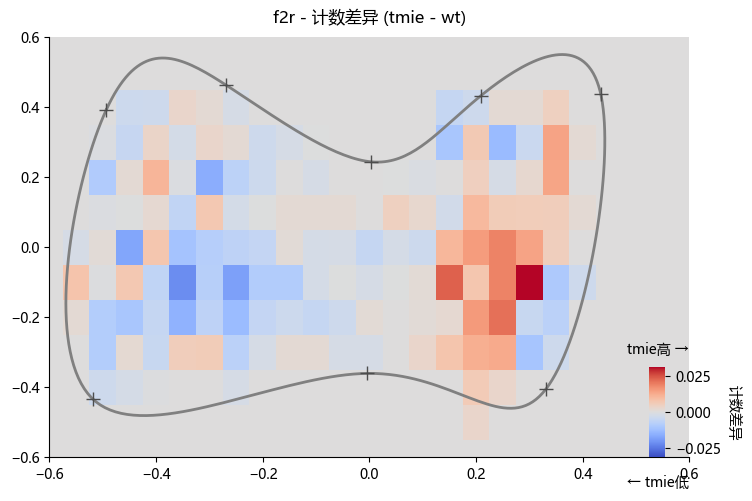

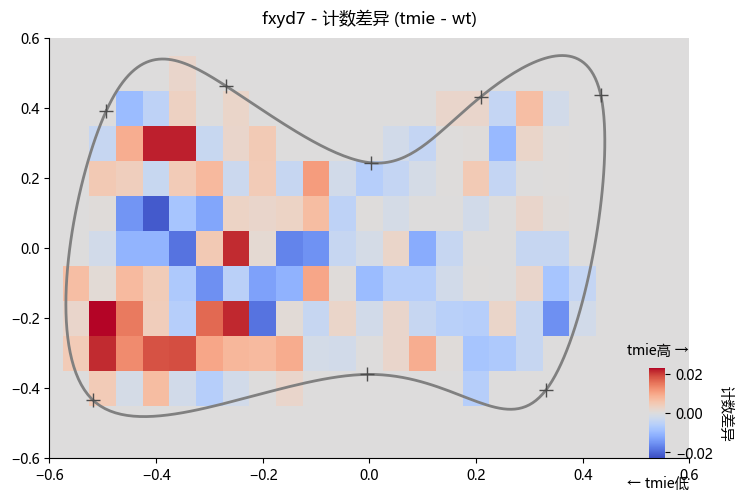

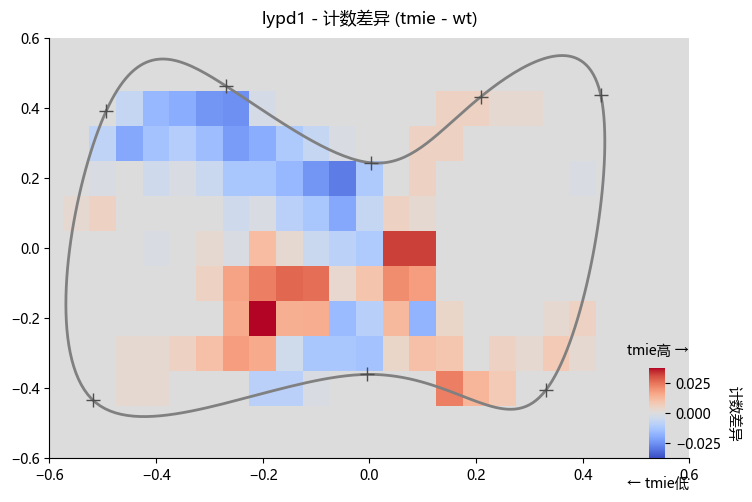

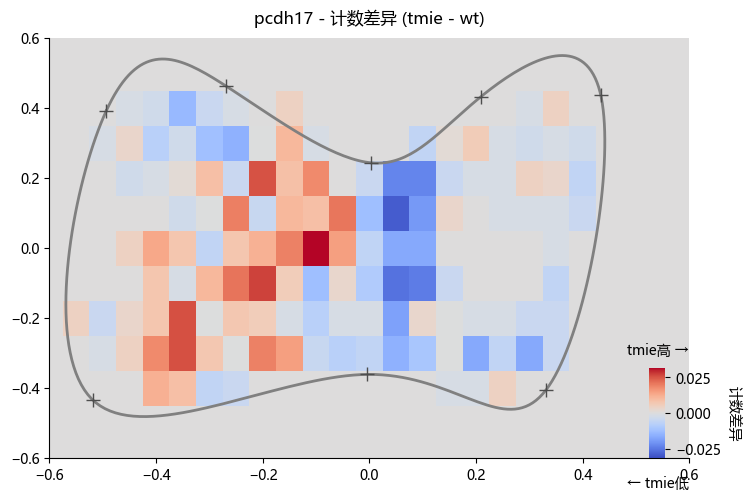

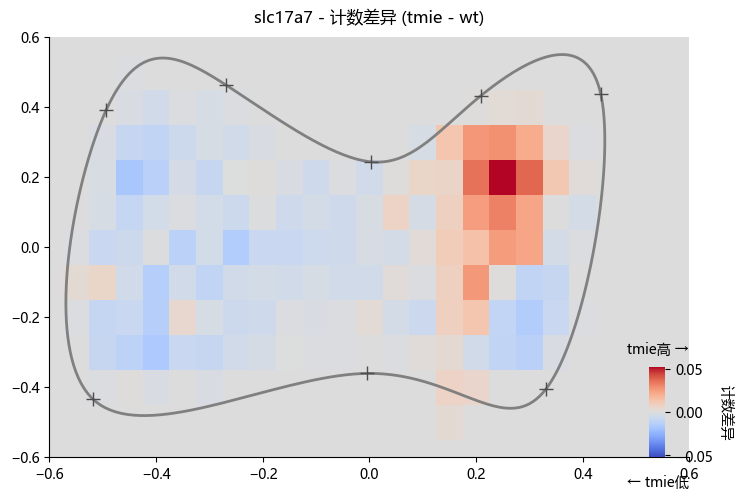

In [7]:
# ----------------------
# ÊâßË°åÂàÜÊûê
# ----------------------
# ----------------------
# ‰øùÂ≠òÁªìÊûúÂíåÁªòÂõæ
# ----------------------
min_count = 0
max_count = 0.02

# ÂàõÂª∫ÁªìÊûúÊñá‰ª∂Â§π
if cell_num > 0:
    comparison_results_folder = os.path.join(summary_folder, f"grid_comparison_{sample_types[0]}_vs_{sample_types[1]}_{cell_num}")
else:
    comparison_results_folder = os.path.join(summary_folder, f"grid_comparison_{sample_types[0]}_vs_{sample_types[1]}")
os.makedirs(comparison_results_folder, exist_ok=True)

print("\n===== ÂºÄÂßãËíôÁâπÂç°Ê¥õÊ®°ÊãüÊØîËæÉ =====")
comparison_results = []
# Ëé∑Âèñ‰∏§‰∏™Ê†∑ÂìÅÁöÑÊï∞ÊçÆ

# ÊØîËæÉ‰∏§‰∏™Ê†∑ÂìÅÁöÑÊâÄÊúâÂÖ±ÊúâÊ†áËÆ∞
for marker in common_markers:
    gene = marker.replace('_isPositive', '')
    x_col = 'standardized_x'
    y_col = 'standardized_y'
    
    # Ê£ÄÊü•‰∏§‰∏™Ê†∑ÂìÅÊòØÂê¶ÈÉΩÊúâËØ•Ê†áËÆ∞ÂíåÂùêÊ†áÂàó
    valid = True
    for st in sample_types:
        if x_col not in data1.columns or y_col not in data2.columns:
            print(f"‚ö†Ô∏è Ë≠¶Âëä: {st}Êú™ÊâæÂà∞Ê†áÂáÜÂåñÂùêÊ†áÂàóÔºåË∑≥Ëøá {marker}")
            valid = False
            break
        if marker not in common_markers:
            print(f"‚ö†Ô∏è Ë≠¶Âëä: {st}Êú™ÊâæÂà∞Ê†áËÆ∞ {marker}ÔºåË∑≥Ëøá")
            valid = False
            break
    
    if not valid:
        continue
    
    print(f"\n===== ÊØîËæÉ {marker} Âú® {sample_types[0]} Âíå {sample_types[1]} ‰πãÈó¥ =====")
        
    # ÊâßË°å‰∏§‰∏™Ê†∑ÂìÅÈó¥ÁöÑËíôÁâπÂç°Ê¥õÊ®°Êãü
    result = monte_carlo_simulation(
        data1, data2, marker,
        x_col, y_col, bx_bins, by_bins, n_simulations
    )
    
    if result is not None:
        total_diff = np.sum(np.abs(result['real_diff']))
        print(f"{marker} ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå: {total_diff}")
        
        if total_diff > 0:
            # ËøõË°åpÂÄºÊ†°Ê≠£
            result['corrected_p'] = correct_grid_pvalues(result['p_values'], method=correction_method)
            comparison_results.append(result)
            print(f"‚úÖ {marker} ÊØîËæÉÂÆåÊàê")
        else:
            print(f"‚ùå {marker} ÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå‰∏∫0Ôºå‰∏çÊ∑ªÂä†Âà∞ÁªìÊûú‰∏≠")
    else:
        print(f"‚ùå {marker} ÊØîËæÉÂ§±Ë¥•ÔºåÊú™ÁîüÊàêÁªìÊûú")



# ----------------------
# ‰øÆÊîπÁªòÂõæË∞ÉÁî®ÈÄªËæëÔºöÂè™ÁªòÂà∂Â∑ÆÂÄºÁÉ≠ÂõæÂíåpÂÄºÁÉ≠Âõæ
# ----------------------
if comparison_results:
    print("\n===== ‰øùÂ≠òÊ†∑ÂìÅÈó¥ÊØîËæÉÁªìÊûúÂπ∂ÁªòÂà∂Â∑ÆÂÄºÁÉ≠Âõæ =====")
    for result in comparison_results:
        gene = result['gene']
        # 1. ‰øùÂ≠òÂéüÂßãÊï∞ÊçÆÊñá‰ª∂
        np.savetxt(os.path.join(comparison_results_folder, f'{gene}_{sample_types[0]}_counts.csv'), 
                  result['real_counts1'], delimiter=',', fmt='%d')
        np.savetxt(os.path.join(comparison_results_folder, f'{gene}_{sample_types[1]}_counts.csv'), 
                  result['real_counts2'], delimiter=',', fmt='%d')
        np.savetxt(os.path.join(comparison_results_folder, f'{gene}_diff_counts.csv'), 
                  result['real_diff'], delimiter=',', fmt='%d')
        np.savetxt(os.path.join(comparison_results_folder, f'{gene}_corrected_p.csv'), 
                  result['corrected_p'], delimiter=',', fmt='%.6f')
        
        # 2. Êï∞ÊçÆÊ†°È™å
        sample1_data = data1
        sample2_data = data2
        required_cols = [f'{gene}_isPositive', 'standardized_x', 'standardized_y']
        s1_valid = all(col in sample1_data.columns for col in required_cols)
        s2_valid = all(col in sample2_data.columns for col in required_cols)
        
        if not s1_valid or not s2_valid:
            missing = []
            if not s1_valid:
                missing.append(f"{sample_types[0]}: {', '.join([c for c in required_cols if c not in sample1_data.columns])}")
            if not s2_valid:
                missing.append(f"{sample_types[1]}: {', '.join([c for c in required_cols if c not in sample2_data.columns])}")
            print(f"‚ö†Ô∏è {gene} Áº∫Â∞ëÂàó: {'; '.join(missing)}ÔºåË∑≥ËøáÁªòÂõæ")
            continue
        
        # 3. Âè™ÁªòÂà∂ËÆ°Êï∞Â∑ÆÂÄºÁÉ≠ÂõæÂíåpÂÄºÁÉ≠Âõæ
        # ÁªòÂà∂ËÆ°Êï∞Â∑ÆÂÄºÁÉ≠ÂõæÔºàtmieÈ´ò‰∏∫Á∫¢Ëâ≤Ôºå‰Ωé‰∏∫ËìùËâ≤Ôºâ
        plot_count_diff_heatmap(
            result=result,
            gene=gene,
            bx_min=bx_min,
            bx_max=bx_max,
            by_min=by_min,
            by_max=by_max,
            BX=BX,
            BY=BY,
            output_folder=comparison_results_folder
        )
        
        # ÁªòÂà∂Ê†∑ÂìÅÈó¥Â∑ÆÂºÇpÂÄºÁÉ≠ÂõæÔºà‰øùÁïôÔºâ
        plot_sample_diff_p_heatmap(
            result=result,
            gene=gene,
            bx_min=bx_min,
            bx_max=bx_max,
            by_min=by_min,
            by_max=by_max,
            BX=BX,
            BY=BY,
            output_folder=comparison_results_folder
        )
else:
    print("\n‚ö†Ô∏è Ê≤°ÊúâÁîüÊàê‰ªª‰ΩïÊúâÊïàÊØîËæÉÁªìÊûú")

print("\n===== ÊâÄÊúâÁªòÂõæÂÆåÊàê =====")

In [8]:
def xcol_two_sample_monte(data1, data2, is_positive_col, x_col, bx_bins, n_simulations):
    """
    ÊåâXËΩ¥ÂàóËÆ°ÁÆó‰∏§‰∏™Ê†∑ÂìÅÈó¥ÁöÑÂ∑ÆÂºÇÊòæËëóÊÄß
    ÈÄªËæëÔºöÂÖàÂàÜÂà´Áî®Ëé∑ÂèñÂçï‰∏™Ê†∑ÂìÅÁöÑÂàóËÆ°Êï∞ÔºåÂÜçÈÄöËøáËíôÁâπÂç°Ê¥õÊ®°ÊãüÊØîËæÉÂ∑ÆÂºÇ
    """
    filtered1 = data1[data1[is_positive_col] != -1].copy()
    filtered1[is_positive_col] = filtered1[is_positive_col].astype(bool)
    filtered2 = data2[data2[is_positive_col] != -1].copy()
    filtered2[is_positive_col] = filtered2[is_positive_col].astype(bool)
    # Ê≠•È™§1ÔºöÂàÜÂà´ËÆ°ÁÆó‰∏§‰∏™Ê†∑ÂìÅÁöÑXËΩ¥ÂàóÁúüÂÆûËÆ°Êï∞
    result1 = count_positive_in_x_bins(filtered1, is_positive_col, x_col, bx_bins)
    result2 = count_positive_in_x_bins(filtered2, is_positive_col, x_col, bx_bins)
    sum1 = np.sum(result1)
    sum2 = np.sum(result2)

    if result1 is None or result2 is None:
        print(f"‚ö†Ô∏è {is_positive_col}ÔºöÂçï‰∏™Ê†∑ÂìÅx_binËÆ°Êï∞ÂàÜÊûêÂ§±Ë¥•ÔºåË∑≥Ëøá‰∏§Ê†∑ÂìÅÊØîËæÉ")
        return None
    
    # ÊèêÂèñ‰∏§‰∏™Ê†∑ÂìÅÁöÑÁúüÂÆûÂàóËÆ°Êï∞
    real_counts1 = result1/sum1  # Ê†∑ÂìÅ1ÁöÑXËΩ¥ÂàóËÆ°Êï∞ÊØî‰æãÔºàshape: (num_xbins,)Ôºâ
    real_counts2 = result2/sum2  # Ê†∑ÂìÅ2ÁöÑXËΩ¥ÂàóËÆ°Êï∞ÊØî‰æãÔºàshape: (num_xbins,)Ôºâ
    
    # ËÆ°ÁÆó‰∏§Ê†∑ÂìÅÁöÑÁúüÂÆûÂ∑ÆÂºÇÔºàÊ†∑ÂìÅ1 - Ê†∑ÂìÅ2ÔºåÊàñÊ†πÊçÆÈúÄÊ±ÇÊîπ‰∏∫tmie - wtÔºâ
    real_diff = real_counts1 - real_counts2
    total_real_diff = np.sum(np.abs(real_diff))
    
    if total_real_diff == 0:
        print(f"‚ö†Ô∏è {is_positive_col}Ôºö‰∏§Ê†∑ÂìÅÁúüÂÆûÂ∑ÆÂºÇÊÄªÂíå‰∏∫0ÔºåË∑≥ËøáÊ®°Êãü")
        return None
    
    # Ê≠•È™§2ÔºöËíôÁâπÂç°Ê¥õÊ®°ÊãüÊØîËæÉ‰∏§Ê†∑ÂìÅÂ∑ÆÂºÇÔºàÊâì‰π±Ê†áËÆ∞ÂàÜÈÖçÔºåËÆ°ÁÆóÂ∑ÆÂºÇÊòæËëóÊÄßÔºâ
    # ÂêàÂπ∂‰∏§‰∏™Ê†∑ÂìÅÁöÑÈò≥ÊÄßÊ†áËÆ∞ÂÄºÔºàÁî®‰∫éÊâì‰π±ÈáçÂàÜÈÖçÔºâ
    orig1 = filtered1[is_positive_col].values.copy()
    # orig2 = filtered2[is_positive_col].values.copy()

    sim_diffs = np.zeros((n_simulations, len(real_diff)))
    
    # ÊâßË°åËíôÁâπÂç°Ê¥õÊ®°ÊãüÔºàËÅöÁÑ¶ÂàóÂ∑ÆÂºÇÔºâ
    for i in tqdm(range(n_simulations), desc=f"Ê®°Êãü {is_positive_col} ÂàóÂ∑ÆÂºÇ"):
        # Êâì‰π±Êï∞ÊçÆÊ†áÁ≠æ
        shuffled1 = orig1.copy()
        #shuffled2 = orig2.copy()
        np.random.shuffle(shuffled1)
        #np.random.shuffle(shuffled2)
        # ‰∏∫‰∏¥Êó∂Êï∞ÊçÆËµãÂÄºÊâì‰π±ÂêéÁöÑÊ†áËÆ∞ÔºåËÆ°ÁÆóÊ®°ÊãüÂàóËÆ°Êï∞
        temp1 = filtered1.copy()
        temp1[is_positive_col] = shuffled1
        temp2 = filtered2.copy()
        #temp2[is_positive_col] = shuffled2
        
        # Ë∞ÉÁî®ËÆ°ÁÆóÂçïÊ¨°Ê®°ÊãüÁöÑÂàóËÆ°Êï∞
        sim_result1 = count_positive_in_x_bins(temp1, is_positive_col, x_col, bx_bins)
        sim_result2 = count_positive_in_x_bins(temp2, is_positive_col, x_col, bx_bins)
        if sim_result1 is not None and sim_result2 is not None:
            sim_diff = sim_result1/sum1 - sim_result2/sum2
            sim_diffs[i] = sim_diff
    
    # Ê≠•È™§3ÔºöËÆ°ÁÆóÂ∑ÆÂºÇpÂÄºÔºàÊ®°ÊãüÂ∑ÆÂºÇÁªùÂØπÂÄº ‚â• ÁúüÂÆûÂ∑ÆÂºÇÁªùÂØπÂÄºÁöÑÊØî‰æãÔºâ
    p_matrix = np.abs(sim_diffs) >= np.abs(real_diff)
    p_values = (np.sum(p_matrix, axis=0)+1)/(n_simulations+1)
    
    # ËøîÂõû‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊûú
    return {
        'is_positive_col': is_positive_col,
        'gene': is_positive_col.replace('_isPositive', ''),
        'real_counts1': real_counts1,  # Ê†∑ÂìÅ1ÁöÑXËΩ¥ÂàóËÆ°Êï∞ÊØî‰æã
        'real_counts2': real_counts2,  # Ê†∑ÂìÅ2ÁöÑXËΩ¥ÂàóËÆ°Êï∞ÊØî‰æã
        'real_diff': real_diff,        # ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÔºàÊ†∑ÂìÅ1 - Ê†∑ÂìÅ2Ôºâ
        'sim_diffs': sim_diffs,        # Ê®°ÊãüÂ∑ÆÂºÇÊï∞ÁªÑ
        'p_values': p_values,          # Êú™Ê†°Ê≠£ÁöÑÂ∑ÆÂºÇpÂÄº
        'corrected_p': None            # È¢ÑÁïôÊ†°Ê≠£ÂêépÂÄºÂ≠óÊÆµ
    }

In [9]:
# ----------------------
# 5. ÊâπÈáèÊâßË°åÊâÄÊúâÊ†áËÆ∞ÁöÑÂàóÂ∑ÆÂºÇÂàÜÊûêÔºàÂéü‰ª£Á†Å‰øùÁïôÔºåÊó†‰øÆÊîπÔºâ
# ----------------------
print("\n===== ÂºÄÂßãÊåâXËΩ¥ÂàóÊâßË°å‰∏§Ê†∑ÂìÅÂ∑ÆÂºÇÊòæËëóÊÄßÂàÜÊûê =====")
xcol_diff_results = []  # Â≠òÂÇ®ÊâÄÊúâÊ†áËÆ∞ÁöÑÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊûú

for col in common_markers:
    gene = col.replace('_isPositive', '')
    x_col = 'standardized_x'  # XËΩ¥Ê†áÂáÜÂåñÂùêÊ†áÂàóÔºà‰∏é‰∏ªÁ®ãÂ∫è‰∏ÄËá¥Ôºâ
    
    # Ê£ÄÊü•ÂùêÊ†áÂàóÊòØÂê¶Â≠òÂú®
    if x_col not in data1.columns or x_col not in data2.columns:
        print(f"‚ö†Ô∏è Ë≠¶Âëä: {sample_types[0]}ÔºàwtÔºâÊàñ{sample_types[1]}ÔºàtmieÔºâÊú™ÊâæÂà∞XËΩ¥ÂùêÊ†áÂàó {x_col}ÔºåË∑≥Ëøá {col}")
        continue
    
    print(f"\n===== ÂàÜÊûêÊ†áËÆ∞: {col}ÔºàÂü∫Âõ†: {gene}Ôºâ =====")
    print(f"‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: {x_col}")
    print(f"XËΩ¥ÂàÜÁÆ±Êï∞Èáè: {num_xbins}")
    
    # ÊâßË°å‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÂàÜÊûêÔºàÂéüÂáΩÊï∞ÔºåÂÅáËÆæÂ∑≤ÊèêÂâçÂÆö‰πâÔºâ
    result = xcol_two_sample_monte(
        data1=data1,
        data2=data2,
        is_positive_col=col,
        x_col=x_col,
        bx_bins=bx_bins,
        n_simulations=n_simulations
    )
    
    if result is not None:
        total_real = np.sum(np.abs(result['real_diff']))
        print(f"{col} ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: {total_real}")
        
        if total_real > 0:
            # ÊâßË°åpÂÄºÊ†°Ê≠£ÔºàË∞ÉÁî®‰∏ªÁ®ãÂ∫è‰∏≠ÁöÑcorrect_grid_pvaluesÔºåÂÅáËÆæÂ∑≤ÂÆö‰πâÔºâ
            result['corrected_p'] = correct_grid_pvalues(result['p_values'], method=correction_method)
            # Êñ∞Â¢ûÔºöËÆ°ÁÆóÂπ∂Â≠òÂÇ®wt(data1)Âíåtmie(data2)ÁöÑÊØî‰æãÔºàÁî®‰∫éÂêéÁª≠ÁªòÂõæÔºâ
            sum1 = np.sum(result['real_counts1'])
            sum2 = np.sum(result['real_counts2'])
            result['tmie_proportion'] = result['real_counts1']
            result['wt_proportion'] = result['real_counts2']
            # Êñ∞Â¢ûÔºöËÆ°ÁÆóÊØî‰æãÂ∑ÆÂÄºÔºàtmie - wtÔºâ
            result['proportion_diff'] = result['tmie_proportion'] - result['wt_proportion']
            xcol_diff_results.append(result)
            print(f"‚úÖ {col} ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ")
        else:
            print(f"‚ùå {col} ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå‰∏∫0Ôºå‰∏çÊ∑ªÂä†Âà∞ÁªìÊûú‰∏≠")
    else:
        print(f"‚ùå {col} ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂ§±Ë¥•ÔºåÊú™ÁîüÊàêÁªìÊûú")

print(f"\n===== ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊùüÔºöÂÖ±{len(xcol_diff_results)}‰∏™Ê†áËÆ∞ÂàÜÊûêÊàêÂäü =====")


===== ÂºÄÂßãÊåâXËΩ¥ÂàóÊâßË°å‰∏§Ê†∑ÂìÅÂ∑ÆÂºÇÊòæËëóÊÄßÂàÜÊûê =====

===== ÂàÜÊûêÊ†áËÆ∞: f2r_isPositiveÔºàÂü∫Âõ†: f2rÔºâ =====
‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: standardized_x
XËΩ¥ÂàÜÁÆ±Êï∞Èáè: 20


Ê®°Êãü f2r_isPositive ÂàóÂ∑ÆÂºÇ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:58<00:00, 169.82it/s]


f2r_isPositive ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: 0.4908903592619731
‚úÖ f2r_isPositive ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ

===== ÂàÜÊûêÊ†áËÆ∞: fxyd7_isPositiveÔºàÂü∫Âõ†: fxyd7Ôºâ =====
‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: standardized_x
XËΩ¥ÂàÜÁÆ±Êï∞Èáè: 20


Ê®°Êãü fxyd7_isPositive ÂàóÂ∑ÆÂºÇ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:06<00:00, 149.91it/s]


fxyd7_isPositive ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: 0.3156662222845916
‚úÖ fxyd7_isPositive ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ

===== ÂàÜÊûêÊ†áËÆ∞: lypd1_isPositiveÔºàÂü∫Âõ†: lypd1Ôºâ =====
‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: standardized_x
XËΩ¥ÂàÜÁÆ±Êï∞Èáè: 20


Ê®°Êãü lypd1_isPositive ÂàóÂ∑ÆÂºÇ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:04<00:00, 156.09it/s]


lypd1_isPositive ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: 0.5579813320677107
‚úÖ lypd1_isPositive ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ

===== ÂàÜÊûêÊ†áËÆ∞: pcdh17_isPositiveÔºàÂü∫Âõ†: pcdh17Ôºâ =====
‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: standardized_x
XËΩ¥ÂàÜÁÆ±Êï∞Èáè: 20


Ê®°Êãü pcdh17_isPositive ÂàóÂ∑ÆÂºÇ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:02<00:00, 159.05it/s]


pcdh17_isPositive ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: 0.7140174481855411
‚úÖ pcdh17_isPositive ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ

===== ÂàÜÊûêÊ†áËÆ∞: slc17a7_isPositiveÔºàÂü∫Âõ†: slc17a7Ôºâ =====
‰ΩøÁî®XËΩ¥ÂùêÊ†áÂàó: standardized_x
XËΩ¥ÂàÜÁÆ±Êï∞Èáè: 20


Ê®°Êãü slc17a7_isPositive ÂàóÂ∑ÆÂºÇ: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [01:07<00:00, 148.08it/s]

slc17a7_isPositive ‰∏§Ê†∑ÂìÅÂàóÂ∑ÆÂºÇÊÄªÂíå: 0.7938475665748392
‚úÖ slc17a7_isPositive ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÂÆåÊàêÔºàÂ∑≤ËÆ°ÁÆóÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ

===== ÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊùüÔºöÂÖ±5‰∏™Ê†áËÆ∞ÂàÜÊûêÊàêÂäü =====


In [10]:
if xcol_diff_results:
    print("\n===== ‰øùÂ≠òÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊûúÔºàÂê´ÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ =====")
    # ÂÆö‰πâË∑ØÂæÑÔºàÂàÜÁ¶ªÁªìÊûúÊñá‰ª∂ÂíåÂèØËßÜÂåñÊñá‰ª∂Ôºâ
    results_folder = comparison_results_folder
    visualization_folder = os.path.join(comparison_results_folder, "grid_visualizations")
    os.makedirs(visualization_folder, exist_ok=True)
    
    for result in xcol_diff_results:
        gene = result['gene']
        
        # ---------------------- ÂéüÊúâÊñá‰ª∂‰øùÂ≠òÔºà‰øùÁïôÔºâ ----------------------
        # 1. ÁúüÂÆûËÆ°Êï∞Ôºàwt=data1Ôºåtmie=data2Ôºâ
        np.savetxt(
            os.path.join(results_folder, f'{gene}_wt_xcol_counts.csv'),
            result['real_counts1'],
            delimiter=',',
            fmt='%.6f'
        )
        np.savetxt(
            os.path.join(results_folder, f'{gene}_tmie_xcol_counts.csv'),
            result['real_counts2'],
            delimiter=',',
            fmt='%.6f'
        )
        
        # 2. ËÆ°Êï∞ÊØî‰æãÔºàwtÂíåtmieÔºâ
        np.savetxt(
            os.path.join(results_folder, f'{gene}_wt_xcol_proportions.csv'),
            result['wt_proportion'],
            delimiter=',',
            fmt='%.6f'
        )
        np.savetxt(
            os.path.join(results_folder, f'{gene}_tmie_xcol_proportions.csv'),
            result['tmie_proportion'],
            delimiter=',',
            fmt='%.6f'
        )
        
        # ---------------------- Êñ∞Â¢ûÔºö‰øùÂ≠òÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂Ôºàtmie - wtÔºâ ----------------------
        np.savetxt(
            os.path.join(results_folder, f'{gene}_tmie_minus_wt_proportion_diff.csv'),
            result['proportion_diff'],
            delimiter=',',
            fmt='%.6f'
        )
        
        # 3. ÂéüÊúâÂ∑ÆÂºÇ‰∏éPÂÄºÊñá‰ª∂
        np.savetxt(
            os.path.join(results_folder, f'{gene}_xcol_real_diff.csv'),
            result['real_diff'],
            delimiter=',',
            fmt='%.6f'
        )
        np.savetxt(
            os.path.join(results_folder, f'{gene}_xcol_corrected_p.csv'),
            result['corrected_p'],
            delimiter=',',
            fmt='%.6f'
        )
                
        print(f"‚úÖ {gene} ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö")
        print(f"   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: {gene}_tmie_minus_wt_proportion_diff.csv")
        print(f"   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ")
    # 1. ÊèêÂèñXËΩ¥ÂàÜÁÆ±‰ø°ÊÅØ
    x_bin_edges = np.linspace(x_fine.min(), x_fine.max(), num_xbins+1)  # Áõ¥Êé•‰ΩøÁî®ÂéüxËΩ¥ÂàÜbinËæπÁïå
    x_bin_labels = [f"Bin{i+1}\n[{x_bin_edges[i]:.2f}-{x_bin_edges[i+1]:.2f}]" for i in range(len(x_bin_edges)-1)]
    x_bin_num = len(x_bin_labels)  # xËΩ¥ÊÄªbinÊï∞
    # 2. Êï¥ÂêàÊâÄÊúâÂü∫Âõ†ÁöÑÂ∑ÆÂÄºÂíåPÂÄºÊï∞ÊçÆ
    marker_list = []          # ÊúâÊïàÂü∫Âõ†ÂàóË°®
    proportion_diff_all = []  # ÊØî‰æãÂ∑ÆÂÄºÔºàtmie - wtÔºâÔºöË°å=Âü∫Âõ†ÔºåÂàó=bin
    corrected_p_all = []      # Ê†°Ê≠£PÂÄº
    # ---------- 1. ËÆ°ÁÆó 20 ‰∏™ bin Á¥¢Âºï ----------
    min_bin_idx  = np.digitize(x_fine.min(), bx_bins) - 1
    max_bin_idx  = np.digitize(x_fine.max(), bx_bins) - 1
    zero_bin_idx  = np.digitize(0, bx_bins) - 1
    x_bins_indices = np.arange(min_bin_idx, min_bin_idx + 20)   # Âõ∫ÂÆö 20 ‰∏™
    x_offsets = x_bins_indices - zero_bin_idx                 # Áõ∏ÂØπ 0 ÁöÑÂÅèÁßªÈáè

    # ---------- 2. ‰ª• 5 ‰∏∫Ê≠•Èïø„ÄÅ‰ª• 0 ‰∏∫‰∏≠ÂøÉÔºåÂè™Âú®Áé∞Êúâ 20 ‰∏™ÂÅèÁßªÈáèÈáåÊåë ----------
    step = 5
    low  = int(np.floor(x_offsets.min() / step) * step)
    high = int(np.ceil(x_offsets.max() / step) * step)
    tick_labels = np.arange(low, high + 1, step)              # 5 ÁöÑÂÄçÊï∞
    tick_labels = tick_labels[np.isin(tick_labels, x_offsets)]  # ÂøÖÂ≠òÂú®

    # ---------- 3. ÂØπÂ∫îÁªòÂõæ‰ΩçÁΩÆ ----------
    tick_positions = [np.where(x_offsets == lab)[0][0] for lab in tick_labels]
    for result in xcol_diff_results:
        gene = result['gene']
        diff = result['proportion_diff']
        corr_p = result['corrected_p']
        
        diff = diff[min_bin_idx:max_bin_idx]
        corr_p = corr_p[min_bin_idx:max_bin_idx]
        
        marker_list.append(gene)
        proportion_diff_all.append(diff)
        corrected_p_all.append(corr_p)
    diff_df = pd.DataFrame(proportion_diff_all, index=marker_list, columns=[f"Bin{i+1}" for i in range(x_bin_num)])
    corr_p_df = pd.DataFrame(corrected_p_all, index=marker_list, columns=[f"Bin{i+1}" for i in range(x_bin_num)])
    diff_df.to_csv(os.path.join(results_folder, f'all_tmie_minus_wt_proportion_diff.csv'), index=True)
    corr_p_df.to_csv(os.path.join(results_folder, f'all_tmie_minus_wt_p_adj.csv'), index=True)


===== ‰øùÂ≠òÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊûúÔºàÂê´ÊØî‰æãÂèäÂ∑ÆÂÄºÔºâ =====
‚úÖ f2r ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö
   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: f2r_tmie_minus_wt_proportion_diff.csv
   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ
‚úÖ fxyd7 ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö
   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: fxyd7_tmie_minus_wt_proportion_diff.csv
   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ
‚úÖ lypd1 ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö
   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: lypd1_tmie_minus_wt_proportion_diff.csv
   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ
‚úÖ pcdh17 ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö
   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: pcdh17_tmie_minus_wt_proportion_diff.csv
   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ
‚úÖ slc17a7 ÁªìÊûú‰øùÂ≠òÂÆåÊàêÔºö
   - ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂: slc17a7_tmie_minus_wt_proportion_diff.csv
   - ÂÖ∂‰ªñÊñá‰ª∂: ËÆ°Êï∞/ÊØî‰æã/PÂÄºÊñá‰ª∂ÔºàÊåâÂéüÊ†ºÂºè‰øùÂ≠òÔºâ


In [11]:
diff_df = pd.read_csv(os.path.join(results_folder, f'all_tmie_minus_wt_proportion_diff.csv'), index_col = 0, header = 0)
corr_p_df = pd.read_csv(os.path.join(results_folder, f'all_tmie_minus_wt_p_adj.csv'), index_col=0, header = 0)
# ----------------------
# 6. ‰øùÂ≠òÂàÜÊûêÁªìÊûúÔºàÂê´ÊØî‰æãÂ∑ÆÂÄºÊñá‰ª∂Ôºâ
# ----------------------
target_marker_order = ['lypd1', 'f2r', 'fxyd7', 'slc17a7', 'pcdh17']  # ‰ªé‰∏äÂà∞‰∏ãÁöÑÈ°∫Â∫è
if xcol_diff_results:
    # ---------------------- Ê†∏ÂøÉ‰øÆÊîπÔºöÁªòÂà∂„ÄåÊØî‰æãÂ∑ÆÂÄº+Ê†°Ê≠£PÂÄº„ÄçÂèåÂ≠êÂõæÁÉ≠Âõæ ----------------------
    print("\n===== ÁªòÂà∂ÊØî‰æãÂ∑ÆÂÄº+Ê†°Ê≠£PÂÄºÊï¥ÂêàÁÉ≠Âõæ =====")
    # ÁªòÂõæÂèÇÊï∞ÔºàÂèØÊ†πÊçÆÊï∞ÊçÆË∞ÉÊï¥Ôºâ
    diff_abs_max = 0.1  # ÊØî‰æãÂ∑ÆÂÄºÁöÑÊúÄÂ§ßÁªùÂØπÂÄºÔºàÁ°Æ‰øùÈ¢úËâ≤ÂØπÁß∞ÔºåÂ¶Ç¬±0.1Ôºâ
    p_threshold = 0.05  # ÊòæËëóÊÄßÈòàÂÄº
    
    # 1. ÊèêÂèñXËΩ¥ÂàÜÁÆ±‰ø°ÊÅØ
    x_bin_edges = np.linspace(x_fine.min(), x_fine.max(), num_xbins+1)  # Áõ¥Êé•‰ΩøÁî®ÂéüxËΩ¥ÂàÜbinËæπÁïå
    x_bin_labels = [f"Bin{i+1}\n[{x_bin_edges[i]:.2f}-{x_bin_edges[i+1]:.2f}]" for i in range(len(x_bin_edges)-1)]
    x_bin_num = len(x_bin_labels)  # xËΩ¥ÊÄªbinÊï∞
    
    # 3. Êó†ÊúâÊïàÊï∞ÊçÆÊó∂Ë∑≥Ëøá
    if len(marker_list) == 0:
        print("‚ö†Ô∏è Êó†ÊúâÊïàÂü∫Âõ†Êï∞ÊçÆÔºåË∑≥ËøáÁÉ≠ÂõæÁªòÂà∂")
    else:
        # 4. ËΩ¨Êç¢‰∏∫DataFrame        
        # 1. Á≠õÈÄâÔºöÂè™‰øùÁïôÁõÆÊ†áMarkerÁöÑÊï∞ÊçÆÔºàÊéíÈô§‰∏çÂú®ÁõÆÊ†áÂàóË°®‰∏≠ÁöÑMarkerÔºâ
        diff_df_filtered = diff_df.loc[diff_df.index.isin(target_marker_order)]  # ËÆ°Êï∞Êï∞ÊçÆÁ≠õÈÄâ
        corr_p_df_filtered = corr_p_df.loc[corr_p_df.index.isin(target_marker_order)]  # pÂÄºÊï∞ÊçÆÁ≠õÈÄâ
        
        # 2. ÈáçÊéíÂ∫èÔºöÊåâtarget_marker_orderÁöÑÈ°∫Â∫èË∞ÉÊï¥Ë°åÁ¥¢ÂºïÔºàÊ†∏ÂøÉÊ≠•È™§Ôºâ
        diff_df = diff_df_filtered.reindex(target_marker_order)  # ËÆ°Êï∞Êï∞ÊçÆÊåâÁõÆÊ†áÈ°∫Â∫èÊéíÂàó
        corr_p_df = corr_p_df_filtered.reindex(target_marker_order)  # pÂÄºÊï∞ÊçÆÊåâÁõÆÊ†áÈ°∫Â∫èÊéíÂàó

        # 5. Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ
        diff_clipped = diff_df.clip(lower=-diff_abs_max, upper=diff_abs_max)  # ÈôêÂà∂Â∑ÆÂÄºËåÉÂõ¥ÔºåÈÅøÂÖçÈ¢úËâ≤Ê∫¢Âá∫
        corr_p_clipped = corr_p_df.clip(upper=p_threshold)  # PÂÄºË∂ÖËøáÈòàÂÄºËÆæ‰∏∫ÈòàÂÄº
        
        # 6. ÂàõÂª∫ÂèåÁîüÂ≠êÂõæÔºà‰∏äÔºöÊØî‰æãÂ∑ÆÂÄºÔºå‰∏ãÔºöÊ†°Ê≠£PÂÄºÔºâ
        fig, (ax1, ax2) = plt.subplots(
            2, 1, 
            figsize=(12, 1*len(target_marker_order)),  # È´òÂ∫¶ÈöèÂü∫Âõ†Êï∞ÈáèËá™ÈÄÇÂ∫î
            gridspec_kw={'height_ratios': [1, 0.8]}  # Â∑ÆÂÄºÂõæÁï•È´òÔºåPÂÄºÂõæÁï•ÁüÆ
        )
        fig.suptitle(
            f"X-axis Bins Analysis: wt vs tmie",
            fontsize=14,
            y=0.98
        )
        
        # ---------------------- Â≠êÂõæ1ÔºöÊØî‰æãÂ∑ÆÂÄºÁÉ≠ÂõæÔºàÊ†∏ÂøÉ‰øÆÊîπÔºâ ----------------------
        # È¢úËâ≤Êò†Â∞ÑÔºöRdBu_rÔºàÁ∫¢‚ÜíÁôΩ‚ÜíËìùÔºåÂèçËΩ¨ÂêéËìùË¥üÁ∫¢Ê≠£ÔºåÁ¨¶ÂêàÈúÄÊ±ÇÔºâ
        im1 = ax1.imshow(
            diff_clipped.values,
            cmap='RdBu_r',        # ÂÖ≥ÈîÆÔºöÁ∫¢Ëâ≤=tmieÈ´òÔºåËìùËâ≤=tmie‰ΩéÔºåÁôΩËâ≤=Êó†Â∑ÆÂºÇ
            aspect='auto',
            vmin=-diff_abs_max,   # È¢úËâ≤ÂØπÁß∞ÔºöË¥üÂêëÊúÄÂ§ß= -diff_abs_max
            vmax=diff_abs_max     # Ê≠£ÂêëÊúÄÂ§ß= diff_abs_max
        )
        # ÂùêÊ†áËΩ¥ËÆæÁΩÆ
        ax1.set_xticks(tick_positions)
        ax1.set_xticklabels(tick_labels, fontsize=15)
        ax1.set_xlabel("offset from border", fontsize=10)

        ax1.set_yticks(range(len(target_marker_order)))
        ax1.set_yticklabels([word.capitalize() for word in diff_clipped.index], fontsize=15)
        ax1.set_ylabel("Genes", fontsize=12, labelpad=10)
        ax1.set_title(
            f"Proportion Difference (tmie - wt)\n(Blue: tmie < wt | Red: tmie > wt)",
            fontsize=15,
            pad=8
        )
        
        # Â∑ÆÂÄºÂõæÈ¢úËâ≤Êù°ÔºàÂ∏¶Ê≠£Ë¥üÊ†áÁ≠æÔºâ
        cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8, aspect=20)
        cbar1.outline.set_visible(False)
        cbar1.set_label("tmie - wt Proportion", fontsize=15, labelpad=8)
        cbar1.set_ticks([-diff_abs_max, 0, diff_abs_max])
        cbar1.set_ticklabels([f"-{diff_abs_max:.3f}", "0", f"+{diff_abs_max:.3f}"])
        
        # ---------------------- Â≠êÂõæ2ÔºöÊ†°Ê≠£PÂÄºÁÉ≠ÂõæÔºà‰øùÁïôÔºåËæÖÂä©Âà§Êñ≠ÊòæËëóÊÄßÔºâ ----------------------
        im2 = ax2.imshow(
            corr_p_clipped.values,
            cmap='Reds_r',       # Á∫¢Ëâ≤=PÂÄºÂ∞èÔºàÊòæËëóÔºâÔºåÁôΩËâ≤=PÂÄºÂ§ßÔºà‰∏çÊòæËëóÔºâ
            aspect='auto',
            vmin=0,
            vmax=p_threshold
        )
        # ÂùêÊ†áËΩ¥ËÆæÁΩÆÔºàÈöêËóèYËΩ¥Ê†áÁ≠æÔºå‰∏é‰∏äÂ≠êÂõæÂü∫Âõ†È°∫Â∫è‰∏ÄËá¥Ôºâ
        ax2.set_xticks(tick_positions)
        ax2.set_xticklabels(tick_labels, fontsize=15)
        ax2.set_xlabel("offset from border", fontsize=10)
        
        ax2.set_yticks(range(len(target_marker_order)))
        ax2.set_yticklabels([word.capitalize() for word in diff_clipped.index], fontsize=15)
        ax2.set_title(f"q-value (FDR ‚â§ {p_threshold})", fontsize=15, pad=8)
        
        # PÂÄºÂõæÈ¢úËâ≤Êù°
        cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8, aspect=20)
        cbar2.outline.set_visible(False)
        cbar2.set_label("FDR", fontsize=10, labelpad=8)
        cbar2.set_ticks([0, p_threshold/2, p_threshold])
        cbar2.set_ticklabels([f"{x:.3f}" for x in [0, p_threshold/2, p_threshold]])
        
        # 7. Ë∞ÉÊï¥Â∏ÉÂ±ÄÔºåÈÅøÂÖçÊ†áÁ≠æÊà™Êñ≠
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # 8. ‰øùÂ≠òÁÉ≠ÂõæÔºàÈ´òÂàÜËæ®ÁéáÔºâ
        heatmap_path = os.path.join(visualization_folder, "wt_vs_tmie_proportion_diff_heatmap")
        plt.savefig(heatmap_path + ".png", dpi=1200, bbox_inches='tight')
        plt.savefig(heatmap_path + ".pdf", dpi=1200, bbox_inches='tight')
        plt.savefig(heatmap_path + ".eps", format = 'eps', dpi=1200, bbox_inches='tight')
        plt.close(fig)
        
        print(f"‚úÖ Êï¥ÂêàÁÉ≠Âõæ‰øùÂ≠òÂÆåÊàêÔºö{heatmap_path}")
        print(f"   - ‰∏äÂ≠êÂõæÔºöÊØî‰æãÂ∑ÆÂÄºÔºàÁ∫¢Ëâ≤=tmieÈ´òÔºåËìùËâ≤=tmie‰ΩéÔºâ")
        print(f"   - ‰∏ãÂ≠êÂõæÔºöÊòæËëóÊÄßPÂÄºÔºàÁ∫¢Ëâ≤=ÊòæËëóÔºåÁôΩËâ≤=‰∏çÊòæËëóÔºâ")

else:
    print("\n‚ö†Ô∏è Ê≤°ÊúâÁîüÊàêÊúâÊïàÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÁªìÊûúÔºåË∑≥Ëøá‰øùÂ≠òÂíåÁªòÂõæ")

print(f"\n===== ÊâÄÊúâÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÊµÅÁ®ãÂÆåÊàêÔºÅÁªìÊûúË∑ØÂæÑÔºö{comparison_results_folder} =====")


===== ÁªòÂà∂ÊØî‰æãÂ∑ÆÂÄº+Ê†°Ê≠£PÂÄºÊï¥ÂêàÁÉ≠Âõæ =====
‚úÖ Êï¥ÂêàÁÉ≠Âõæ‰øùÂ≠òÂÆåÊàêÔºöD:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt\grid_visualizations\wt_vs_tmie_proportion_diff_heatmap
   - ‰∏äÂ≠êÂõæÔºöÊØî‰æãÂ∑ÆÂÄºÔºàÁ∫¢Ëâ≤=tmieÈ´òÔºåËìùËâ≤=tmie‰ΩéÔºâ
   - ‰∏ãÂ≠êÂõæÔºöÊòæËëóÊÄßPÂÄºÔºàÁ∫¢Ëâ≤=ÊòæËëóÔºåÁôΩËâ≤=‰∏çÊòæËëóÔºâ

===== ÊâÄÊúâÊåâXËΩ¥ÂàóÂ∑ÆÂºÇÂàÜÊûêÊµÅÁ®ãÂÆåÊàêÔºÅÁªìÊûúË∑ØÂæÑÔºöD:/Ruiqi/vg_space_mapping/wt/summary\grid_comparison_tmie_vs_wt =====


## üéØ ‰ΩçÁΩÆÊòæËëóÊÄßÂàÜÊûêÂÆåÊàêÔºÅ

ÊâÄÊúâÂàÜÊûêÊ≠•È™§Â∑≤ÂÆåÊàêÔºåÂåÖÊã¨Ôºö
- ‚úÖ Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
- ‚úÖ ‰ΩçÁΩÆÂàÜÂ∏ÉÂå∫Èó¥ÂàõÂª∫
- ‚úÖ ËíôÁâπÂç°Ê¥õÊ®°ÊãüÂàÜÊûê
- ‚úÖ Â§öÈáçÊØîËæÉÊ†°Ê≠£
- ‚úÖ ÁªìÊûú‰øùÂ≠òÂíåÂèØËßÜÂåñ

**ÁîüÊàêÁöÑÊñá‰ª∂**:
- ‰ΩçÁΩÆÊòæËëóÊÄßÁªìÊûúCSVÊñá‰ª∂
- ÁÉ≠ÂõæÂèØËßÜÂåñÂõæÁâá

**Â¶ÇÊûúÈÅáÂà∞ÈóÆÈ¢ò**:
1. Ê£ÄÊü•Ê®°ÂùóÂØºÂÖ•ÊòØÂê¶Ê≠£Á°Æ
2. È™åËØÅÊï∞ÊçÆÊñá‰ª∂Ë∑ØÂæÑ
3. Êü•ÁúãÈîôËØØ‰ø°ÊÅØËøõË°åË∞ÉËØï

**‰∏ã‰∏ÄÊ≠•**: ÂèØ‰ª•Êü•ÁúãÁîüÊàêÁöÑÁªìÊûúÊñá‰ª∂ÂíåÂõæÁâáÔºåÊàñËøõË°åÂÖ∂‰ªñÊï∞ÊçÆÂàÜÊûê„ÄÇ